In [10]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def draw_pr_curve(one_hot,prob):
    plt.clf()
    a=one_hot
    b=prob
    precision,recall,threshold=precision_recall_curve(a,b)
    # print(precision)
    # print(recall)
    # print(threshold)
    plt.plot(recall,precision)
    plt.show()

In [11]:
def draw_confusion_matrix(label,pred):
    plt.clf()
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    c=confusion_matrix(label,pred)
    labels=list(set(label))
    sns.heatmap(data=c,annot=True,xticklabels=labels,yticklabels=labels,fmt='g')
    plt.savefig('./img/confusion_matrix.png',dpi=720)

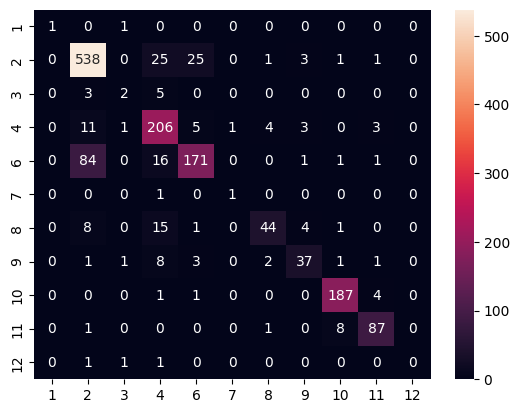

In [13]:
import pandas as pd
f=pd.read_csv('./predict.csv')
f.head()
pred=f['pred']
fg=pd.read_csv('./url/predict/val.csv')
label=fg['label']
draw_confusion_matrix(label,pred)

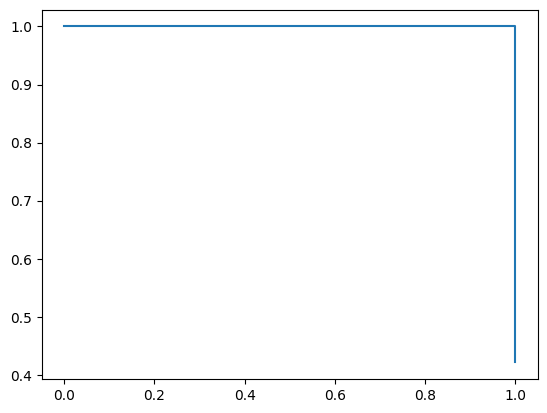

In [25]:
one_hot=pred==2
p=f['prob']
prob=np.zeros((len(p),))
prob[one_hot]=p[one_hot]
draw_pr_curve(one_hot,prob)

In [39]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import PrecisionRecallDisplay
def draw_pr_plots(filename):
    plt.clf()
    plt.figure(figsize=(7,7))
    _,ax=plt.subplots(4,4)
    f=pd.read_csv(filename)
    pred=f['pred']
    pred_bi=label_binarize(pred,classes=[0,1,2,3,4,5,6,7,8,9,10,11,12])
    for i in np.unique(pred):
        one_hot=pred_bi[:,i]
        prob=f[f'{i}']
        precision,recall,_=precision_recall_curve(one_hot,prob)
        disp=PrecisionRecallDisplay(precision,recall)
        disp.plot(ax=ax[i//4,i%4])
        ax[i//4,i%4].set_title(f'class {i}')
    plt.subplots_adjust(left=0.125,
                        bottom=-0.51,
                        right=1.3,
                        top=0.88,
                        wspace=0.5,
                        hspace=0.6
                    )
    plt.savefig('./img/pr_plots.png',dpi=720,bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

<Figure size 700x700 with 0 Axes>

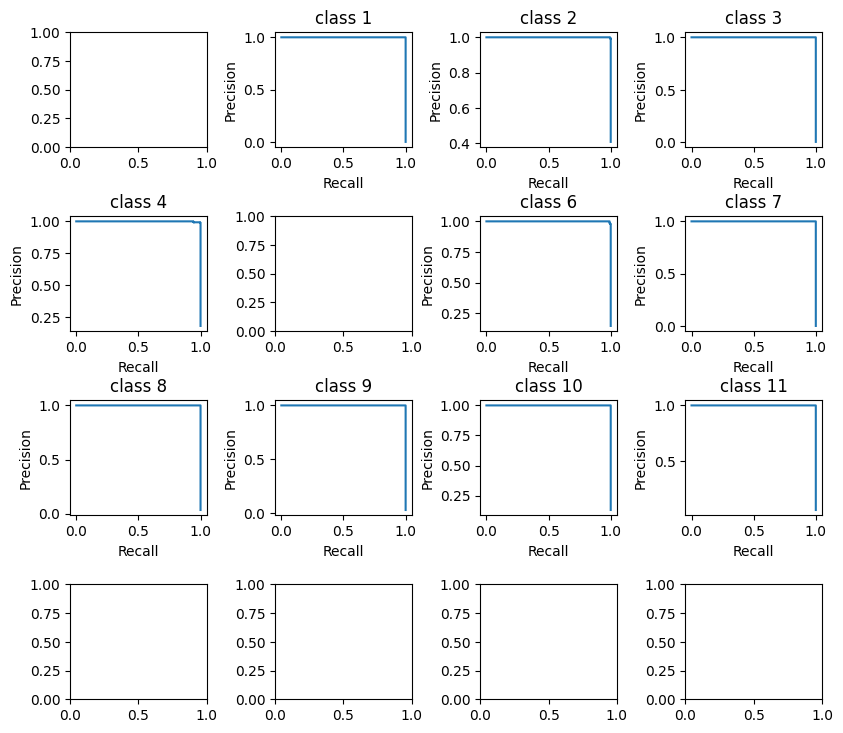

In [40]:
draw_pr_plots('./predict.csv')

In [42]:
origin_file=pd.read_csv('./url/predict/val.csv')
origin_file['label'].value_counts()

2     594
6     274
4     234
10    193
11     97
8      73
9      54
3      10
12      3
1       2
7       2
Name: label, dtype: int64